Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS201.M11.2

Buổi 04 - 10/11/2021

# LAB 04 - MẠNG NEURAL HỒI QUY

## Set up

In [1]:
# Check GPU
!nvidia-smi

Wed Nov 10 05:31:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, Embedding, Input, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score
from keras.regularizers import l2

sn.set() # Set theme

### Load bộ dữ liệu IMDB

In [3]:
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


### Chuẩn bị dữ liệu

In [4]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [5]:
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])

In [6]:
decoded_sequence

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [7]:
# Padding chiều dài của sequence là 200
maxlen = 200
X_train = pad_sequences(train_data, maxlen=maxlen)
X_test = pad_sequences(test_data, maxlen=maxlen)

In [8]:
y_train = to_categorical(train_targets, num_classes = 2)
y_test = test_targets

In [9]:
X_train_new = np.expand_dims(X_train, axis=2)
X_test_new = np.expand_dims(X_test, axis=2)

## **Bài 1**:
Tăng số lượng epoch lên 20 và thực hiện huấn luyện mô hình. Cho biết độ chính xác của mô hình là bao nhiêu? Vẽ đồ thị học.

### Xây dựng mô hình SimpleRNN bằng keras

In [10]:
# Khởi tạo model
model_1 = Sequential()
# Thêm một lớp Input
model_1.add(Input(shape=(None, 1), dtype="float64"))
# Thêm một lớp SimpleRNN với activation là relu
model_1.add(SimpleRNN(200, return_sequences=False, 
                      return_state=False, activation='relu'))
# Thêm một lớp Dense với activation là sigmoid
model_1.add(Dense(2, activation='sigmoid'))

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 200)               40400     
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 40,802
Trainable params: 40,802
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện mô hình

In [12]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = BinaryCrossentropy()
model_1.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [13]:
# Training model
history_1 = model_1.fit(X_train_new, y_train, 
                        validation_split=0.1,
                        batch_size=128, epochs=20)

Epoch 1/20
176/176 [==============================] - 43s 225ms/step - loss: 16.3653 - accuracy: 0.4972 - val_loss: 3.8333 - val_accuracy: 0.4968
Epoch 2/20
176/176 [==============================] - 39s 222ms/step - loss: 3.1331 - accuracy: 0.5022 - val_loss: 2.5721 - val_accuracy: 0.5012
Epoch 3/20
176/176 [==============================] - 39s 221ms/step - loss: 2.4239 - accuracy: 0.5015 - val_loss: 2.3582 - val_accuracy: 0.5140
Epoch 4/20
176/176 [==============================] - 39s 223ms/step - loss: 2.0141 - accuracy: 0.5059 - val_loss: 1.9563 - val_accuracy: 0.5004
Epoch 5/20
176/176 [==============================] - 40s 225ms/step - loss: 1.7597 - accuracy: 0.5125 - val_loss: 1.7079 - val_accuracy: 0.4964
Epoch 6/20
176/176 [==============================] - 39s 224ms/step - loss: 1.6574 - accuracy: 0.5116 - val_loss: 1.7183 - val_accuracy: 0.5040
Epoch 7/20
176/176 [==============================] - 40s 227ms/step - loss: 1.5629 - accuracy: 0.5106 - val_loss: 1.5478 - val_a

### Visualization Loss & Accuracy

#### Accuracy

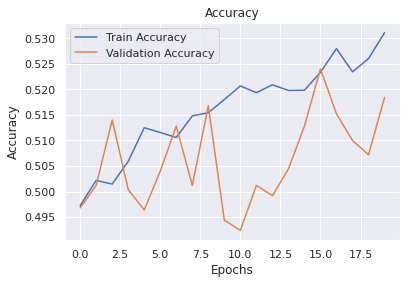

In [14]:
plt.plot(history_1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

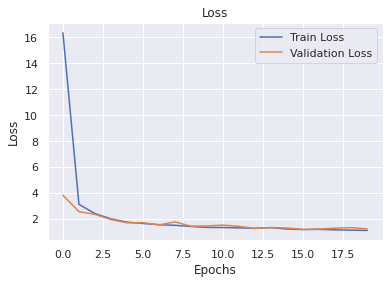

In [15]:
plt.plot(history_1.history['loss'], label = 'Train Loss')
plt.plot(history_1.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [16]:
y_pred = model_1.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 49.97%


## **Bài 2**:
Hãy thử thêm 1 lớp Simple RNN nữa vào mô hình và cho biết kết quả độ chính xác của mô hình như thế nào?
Ghi chú: Thêm vào trước lớp SimpleRNN hiện tại, đặt `return_sequence = True`.

### Xây dựng mô hình SimpleRNN bằng keras

In [17]:
# Khởi tạo model
model_2 = Sequential()
# Thêm một lớp Input
model_2.add(Input(shape=(None, 1), dtype="float64"))
# Thêm một lớp SimpleRNN với activation là relu
model_2.add(SimpleRNN(200, return_sequences=True, 
                      return_state=False, activation='relu'))
# Thêm một lớp SimpleRNN với activation là relu
model_2.add(SimpleRNN(200, return_sequences=False, 
                      return_state=False, activation='relu'))
# Thêm một lớp Dense với activation là sigmoid
model_2.add(Dense(2, activation='sigmoid'))

In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 200)         40400     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 200)               80200     
                                                                 
 dense_1 (Dense)             (None, 2)                 402       
                                                                 
Total params: 121,002
Trainable params: 121,002
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện mô hình

In [19]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = BinaryCrossentropy()
model_2.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [20]:
# Training model
history_2 = model_2.fit(X_train_new, y_train, 
                        validation_split=0.1,
                        batch_size=128, epochs=20)

Epoch 1/20
176/176 [==============================] - 101s 564ms/step - loss: 5.5814 - accuracy: 0.5009 - val_loss: 3.1810 - val_accuracy: 0.4932
Epoch 2/20
176/176 [==============================] - 92s 520ms/step - loss: 2.3454 - accuracy: 0.5058 - val_loss: 1.6087 - val_accuracy: 0.5096
Epoch 3/20
176/176 [==============================] - 93s 527ms/step - loss: 1.5972 - accuracy: 0.5094 - val_loss: 1.2889 - val_accuracy: 0.5172
Epoch 4/20
176/176 [==============================] - 92s 520ms/step - loss: 1.3336 - accuracy: 0.5081 - val_loss: 1.2002 - val_accuracy: 0.4764
Epoch 5/20
176/176 [==============================] - 92s 525ms/step - loss: 1.0982 - accuracy: 0.5116 - val_loss: 1.1153 - val_accuracy: 0.4876
Epoch 6/20
176/176 [==============================] - 91s 514ms/step - loss: 1.1013 - accuracy: 0.5062 - val_loss: 0.8756 - val_accuracy: 0.4972
Epoch 7/20
176/176 [==============================] - 91s 517ms/step - loss: 1.0049 - accuracy: 0.5060 - val_loss: 1.1879 - val_a

### Visualization Loss & Accuracy

#### Accuracy

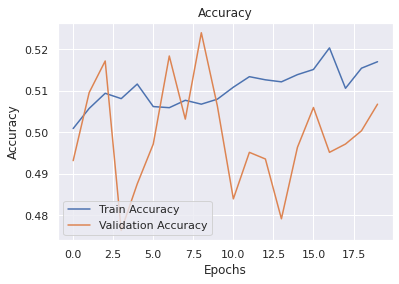

In [21]:
plt.plot(history_2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

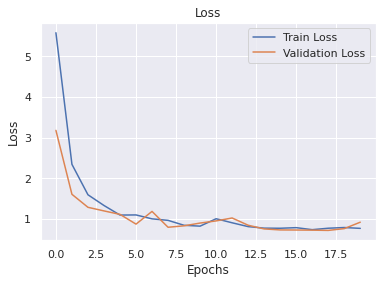

In [22]:
plt.plot(history_2.history['loss'], label = 'Train Loss')
plt.plot(history_2.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [23]:
y_pred = model_2.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 49.98%


## **Bài 3**: 
Xây dựng mô hình gồm 1 lớp Embedding và 1 lớp LSTM kết nối với nhau. Cho biết độ chính xác của mô hình là bao nhiêu? Vẽ đồ thị học.

### Xây dựng mô hình LSTM bằng keras

In [24]:
# Khởi tạo model
model_3 = Sequential()
# Thêm một lớp Input
model_3.add(Input(shape=(None, ), dtype="float64"))
# Thêm một lớp Embedding
model_3.add(Embedding(len(word_index), 128))
# Thêm một lớp Dropout
model_3.add(Dropout(0.3))
# Thêm một lớp LSTM
model_3.add(LSTM(200, return_sequences=False, 
                 kernel_regularizer=l2(0.01), 
                 recurrent_regularizer=l2(0.01), 
                 dropout=0.33))
# Thêm một lớp Dropout
model_3.add(Dropout(0.3))
# Thêm một lớp Dense với activation là sigmoid
model_3.add(Dense(2, activation='sigmoid'))

In [25]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         11338752  
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 11,602,354
Trainable params: 11,602,354
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện mô hình

In [26]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = BinaryCrossentropy()
model_3.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [27]:
# Training model
history_3 = model_3.fit(X_train_new, y_train,
                        validation_split=0.1,
                        batch_size=128, epochs=10)

Epoch 1/10
176/176 [==============================] - 19s 83ms/step - loss: 3.6897 - accuracy: 0.5390 - val_loss: 2.7237 - val_accuracy: 0.6016
Epoch 2/10
176/176 [==============================] - 14s 80ms/step - loss: 2.1323 - accuracy: 0.5895 - val_loss: 1.6583 - val_accuracy: 0.6400
Epoch 3/10
176/176 [==============================] - 14s 80ms/step - loss: 1.3670 - accuracy: 0.6447 - val_loss: 1.1348 - val_accuracy: 0.6424
Epoch 4/10
176/176 [==============================] - 14s 80ms/step - loss: 0.9757 - accuracy: 0.7076 - val_loss: 0.7825 - val_accuracy: 0.7468
Epoch 5/10
176/176 [==============================] - 14s 80ms/step - loss: 0.5766 - accuracy: 0.8236 - val_loss: 0.4904 - val_accuracy: 0.8452
Epoch 6/10
176/176 [==============================] - 14s 80ms/step - loss: 0.4175 - accuracy: 0.8753 - val_loss: 0.4110 - val_accuracy: 0.8704
Epoch 7/10
176/176 [==============================] - 14s 79ms/step - loss: 0.3425 - accuracy: 0.8965 - val_loss: 0.3657 - val_accuracy:

### Visualization Loss & Accuracy

#### Accuracy

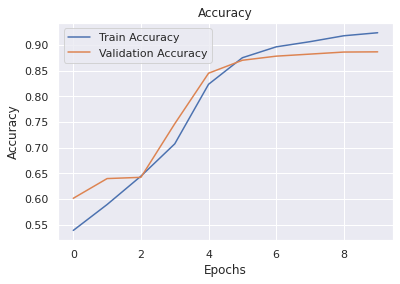

In [28]:
plt.plot(history_3.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

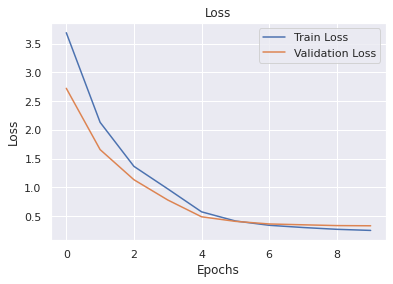

In [29]:
plt.plot(history_3.history['loss'], label = 'Train Loss')
plt.plot(history_3.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [30]:
y_pred = model_3.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 87.57%


## **Bài 4**: 
Xây dựng mô hình gồm 1 lớp Embedding và 2 lớp LSTM kết nối với nhau. Cho biết độ chính xác của mô hình là bao nhiêu? Vẽ đồ thị học.

### Xây dựng mô hình LSTM bằng keras

In [31]:
# Khởi tạo model
model_4 = Sequential()
# Thêm một lớp Input
model_4.add(Input(shape=(None, ), dtype="float64"))
# Thêm một lớp Embedding
model_4.add(Embedding(len(word_index), 128))
# Thêm một lớp Dropout
model_4.add(Dropout(0.3))
# Thêm một lớp LSTM
model_4.add(LSTM(200, return_sequences=True, 
                 kernel_regularizer=l2(0.01), 
                 recurrent_regularizer=l2(0.01), 
                 dropout=0.33))
# Thêm một lớp Dropout
model_4.add(Dropout(0.3))
# Thêm một lớp LSTM
model_4.add(LSTM(64, return_sequences=False))
# Thêm một lớp Dropout
model_4.add(Dropout(0.3))
# Thêm một lớp Dense với activation là sigmoid
model_4.add(Dense(2, activation='sigmoid'))

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         11338752  
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 200)         263200    
                                                                 
 dropout_3 (Dropout)         (None, None, 200)         0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                67840     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                

### Huấn luyện mô hình

In [33]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = BinaryCrossentropy()
model_4.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [34]:
# Training model
history_4 = model_4.fit(X_train_new, y_train, 
                        validation_split=0.1,
                        batch_size=128, epochs=10)

Epoch 1/10
176/176 [==============================] - 25s 122ms/step - loss: 3.6865 - accuracy: 0.5555 - val_loss: 2.7178 - val_accuracy: 0.5224
Epoch 2/10
176/176 [==============================] - 20s 116ms/step - loss: 2.0046 - accuracy: 0.7407 - val_loss: 1.4249 - val_accuracy: 0.8368
Epoch 3/10
176/176 [==============================] - 20s 115ms/step - loss: 1.1280 - accuracy: 0.8593 - val_loss: 0.9109 - val_accuracy: 0.8588
Epoch 4/10
176/176 [==============================] - 20s 115ms/step - loss: 0.7408 - accuracy: 0.8839 - val_loss: 0.6566 - val_accuracy: 0.8748
Epoch 5/10
176/176 [==============================] - 20s 116ms/step - loss: 0.5357 - accuracy: 0.9005 - val_loss: 0.5306 - val_accuracy: 0.8736
Epoch 6/10
176/176 [==============================] - 20s 116ms/step - loss: 0.4348 - accuracy: 0.9060 - val_loss: 0.4673 - val_accuracy: 0.8756
Epoch 7/10
176/176 [==============================] - 20s 116ms/step - loss: 0.3657 - accuracy: 0.9178 - val_loss: 0.4717 - val_ac

### Visualization Loss & Accuracy

#### Accuracy

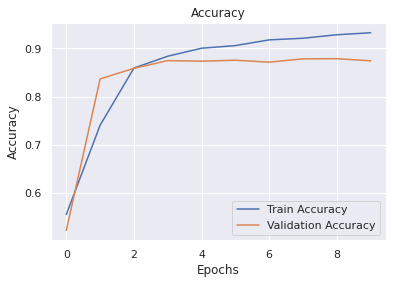

In [35]:
plt.plot(history_4.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

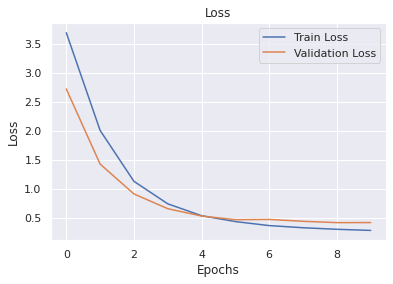

In [36]:
plt.plot(history_4.history['loss'], label = 'Train Loss')
plt.plot(history_4.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [37]:
y_pred = model_4.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 86.19%


##**Bài 5**: 
Tìm hiểu GRU và xây dựng mô hình với lớp GRU (mô hình giống Bài 3, nhưng thay lớp LSTM thành GRU). So sánh kết quả của 2 mô hình.

### Xây dựng mô hình GRU bằng keras

In [38]:
# Khởi tạo model
model_5 = Sequential()
# Thêm một lớp Input
model_5.add(Input(shape=(None, ), dtype="float64"))
# Thêm một lớp Embedding
model_5.add(Embedding(len(word_index), 128))
# Thêm một lớp Dropout
model_5.add(Dropout(0.3))
# Thêm một lớp GRU
model_5.add(GRU(200, return_sequences=False, 
                kernel_regularizer=l2(0.01), 
                recurrent_regularizer=l2(0.01), 
                dropout=0.33))
# Thêm một lớp Dropout
model_5.add(Dropout(0.3))
# Thêm một lớp Dense với activation là sigmoid
model_5.add(Dense(2, activation='sigmoid'))

In [39]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         11338752  
                                                                 
 dropout_5 (Dropout)         (None, None, 128)         0         
                                                                 
 gru (GRU)                   (None, 200)               198000    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 402       
                                                                 
Total params: 11,537,154
Trainable params: 11,537,154
Non-trainable params: 0
_________________________________________________________________


### Huấn luyện mô hình

In [40]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = BinaryCrossentropy()
model_5.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [41]:
# Training model
history_5 = model_5.fit(X_train_new, y_train,
                        validation_split=0.1,
                        batch_size=128, epochs=10)

Epoch 1/10
176/176 [==============================] - 16s 77ms/step - loss: 3.7314 - accuracy: 0.5211 - val_loss: 2.8583 - val_accuracy: 0.5916
Epoch 2/10
176/176 [==============================] - 13s 73ms/step - loss: 2.2921 - accuracy: 0.5805 - val_loss: 1.8246 - val_accuracy: 0.6072
Epoch 3/10
176/176 [==============================] - 13s 73ms/step - loss: 1.5194 - accuracy: 0.6214 - val_loss: 1.2687 - val_accuracy: 0.6172
Epoch 4/10
176/176 [==============================] - 13s 73ms/step - loss: 1.1047 - accuracy: 0.6479 - val_loss: 0.9721 - val_accuracy: 0.6260
Epoch 5/10
176/176 [==============================] - 13s 73ms/step - loss: 0.8797 - accuracy: 0.6672 - val_loss: 0.8069 - val_accuracy: 0.6528
Epoch 6/10
176/176 [==============================] - 13s 74ms/step - loss: 0.6351 - accuracy: 0.7691 - val_loss: 0.4999 - val_accuracy: 0.8352
Epoch 7/10
176/176 [==============================] - 13s 74ms/step - loss: 0.4134 - accuracy: 0.8693 - val_loss: 0.4042 - val_accuracy:

### Visualization Loss & Accuracy

#### Accuracy

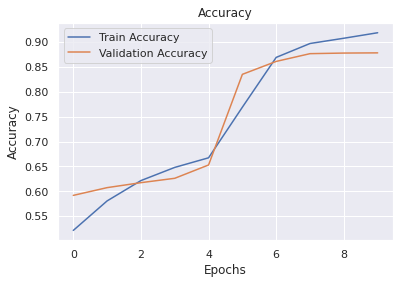

In [42]:
plt.plot(history_5.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

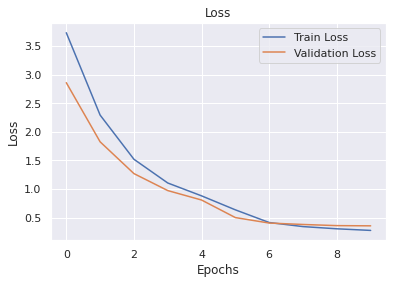

In [43]:
plt.plot(history_5.history['loss'], label = 'Train Loss')
plt.plot(history_5.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [44]:
y_pred = model_5.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 87.29%
